In [2]:
import pandas as pd
data=pd.read_csv('/content/SolarPrediction.csv')
data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [3]:
data['Data']=pd.to_datetime(data['Data'])
data['Month']=data['Data'].dt.month
data['Day']=data['Data'].dt.day
data['Year']=data['Data'].dt.year
data=data.drop(columns=["Data"])
data.head()


,UNIXTime,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Month,Day,Year
0,1475229326,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,9,29,2016
1,1475229023,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,9,29,2016
2,1475228726,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,9,29,2016
3,1475228421,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,9,29,2016
4,1475228124,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,9,29,2016


In [4]:
data['Time']=pd.to_datetime(data['Time'])
data['Hour']=data['Time'].dt.hour
data['Minute']=data['Time'].dt.minute
data['Second']=data['Time'].dt.second
data=data.drop(columns=['Time'])
data.head()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Month,Day,Year,Hour,Minute,Second
0,1475229326,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,9,29,2016,23,55,26
1,1475229023,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,9,29,2016,23,50,23
2,1475228726,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,9,29,2016,23,45,26
3,1475228421,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,9,29,2016,23,40,21
4,1475228124,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,9,29,2016,23,35,24


In [5]:
data['TimeSunRise']=pd.to_datetime(data['TimeSunRise'])
data['TimeSunRiseHour']=data['TimeSunRise'].dt.hour
data['TimeSunRiseMinute']=data['TimeSunRise'].dt.minute
data['TimeSunRiseSecond']=data['TimeSunRise'].dt.second
data=data.drop(columns=['TimeSunRise'])
data.head()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunSet,Month,Day,Year,Hour,Minute,Second,TimeSunRiseHour,TimeSunRiseMinute,TimeSunRiseSecond
0,1475229326,1.21,48,30.46,59,177.39,5.62,18:13:00,9,29,2016,23,55,26,6,13,0
1,1475229023,1.21,48,30.46,58,176.78,3.37,18:13:00,9,29,2016,23,50,23,6,13,0
2,1475228726,1.23,48,30.46,57,158.75,3.37,18:13:00,9,29,2016,23,45,26,6,13,0
3,1475228421,1.21,48,30.46,60,137.71,3.37,18:13:00,9,29,2016,23,40,21,6,13,0
4,1475228124,1.17,48,30.46,62,104.95,5.62,18:13:00,9,29,2016,23,35,24,6,13,0


In [6]:
data['TimeSunSet']=pd.to_datetime(data['TimeSunSet'])
data['TimeSunSeteHour']=data['TimeSunSet'].dt.hour
data['TimeSunSetMinute']=data['TimeSunSet'].dt.minute
data['TimeSunSetSecond']=data['TimeSunSet'].dt.second
data=data.drop(columns=['TimeSunSet'])
data.head()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Month,Day,Year,Hour,Minute,Second,TimeSunRiseHour,TimeSunRiseMinute,TimeSunRiseSecond,TimeSunSeteHour,TimeSunSetMinute,TimeSunSetSecond
0,1475229326,1.21,48,30.46,59,177.39,5.62,9,29,2016,23,55,26,6,13,0,18,13,0
1,1475229023,1.21,48,30.46,58,176.78,3.37,9,29,2016,23,50,23,6,13,0,18,13,0
2,1475228726,1.23,48,30.46,57,158.75,3.37,9,29,2016,23,45,26,6,13,0,18,13,0
3,1475228421,1.21,48,30.46,60,137.71,3.37,9,29,2016,23,40,21,6,13,0,18,13,0
4,1475228124,1.17,48,30.46,62,104.95,5.62,9,29,2016,23,35,24,6,13,0,18,13,0


In [7]:
data.dtypes

UNIXTime                    int64
Radiation                 float64
Temperature                 int64
Pressure                  float64
Humidity                    int64
WindDirection(Degrees)    float64
Speed                     float64
Month                       int64
Day                         int64
Year                        int64
Hour                        int64
Minute                      int64
Second                      int64
TimeSunRiseHour             int64
TimeSunRiseMinute           int64
TimeSunRiseSecond           int64
TimeSunSeteHour             int64
TimeSunSetMinute            int64
TimeSunSetSecond            int64
dtype: object

In [8]:
#abs value in 0 0.5 not skewed
#0.5 to 1 skew
#>1 highly skewed 
data.skew()

UNIXTime                  0.009365
Radiation                 1.369681
Temperature               0.522103
Pressure                 -1.226962
Humidity                 -0.776280
WindDirection(Degrees)    0.568612
Speed                     1.469814
Month                    -0.014397
Day                      -0.061036
Year                      0.000000
Hour                     -0.002702
Minute                   -0.005167
Second                    0.836122
TimeSunRiseHour           0.000000
TimeSunRiseMinute         0.474942
TimeSunRiseSecond         0.000000
TimeSunSeteHour           0.638762
TimeSunSetMinute         -0.922972
TimeSunSetSecond          0.000000
dtype: float64

skew 0.18473310613060862


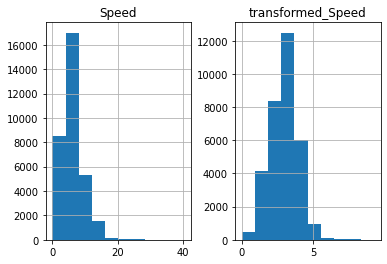

In [9]:
import numpy as np
data['transformed_Speed']=(data['Speed'])**0.6
data[['Speed','transformed_Speed']].hist()
print("skew",data['transformed_Speed'].skew())

skew 0.20308982696478572


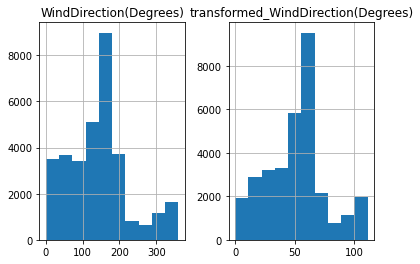

In [10]:
import numpy as np
data['transformed_WindDirection(Degrees)']=(data['WindDirection(Degrees)'])**0.8
data[['WindDirection(Degrees)','transformed_WindDirection(Degrees)']].hist()
print("skew",data['transformed_WindDirection(Degrees)'].skew())

skew 0.25507010326322527


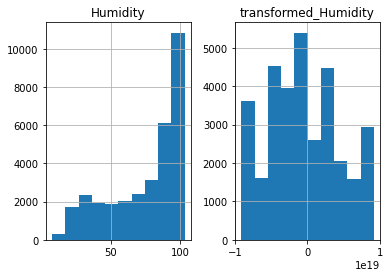

In [11]:
import numpy as np
data['transformed_Humidity']=(data['Humidity'])**14
data[['Humidity','transformed_Humidity']].hist()
print("skew",data['transformed_Humidity'].skew())

skew -0.304258765788359


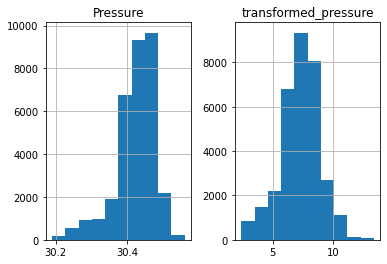

In [12]:
import numpy as np
data['transformed_pressure']=(data['Pressure']/30)**140
data[['Pressure','transformed_pressure']].hist()
print("skew",data['transformed_pressure'].skew())

0.26153936652833903

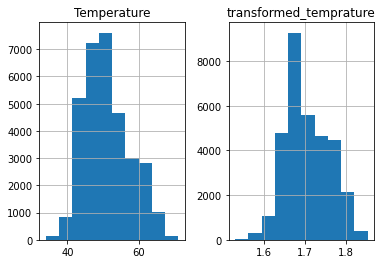

In [13]:
import numpy as np
data['transformed_temprature']=np.log10(data['Temperature'])
data[['Temperature','transformed_temprature']].hist()
data['transformed_temprature'].skew()

In [14]:
data=data.drop(columns=['Temperature','Pressure','Humidity','WindDirection(Degrees)','Speed'])

In [15]:
data.skew()

UNIXTime                              0.009365
Radiation                             1.369681
Month                                -0.014397
Day                                  -0.061036
Year                                  0.000000
Hour                                 -0.002702
Minute                               -0.005167
Second                                0.836122
TimeSunRiseHour                       0.000000
TimeSunRiseMinute                     0.474942
TimeSunRiseSecond                     0.000000
TimeSunSeteHour                       0.638762
TimeSunSetMinute                     -0.922972
TimeSunSetSecond                      0.000000
transformed_Speed                     0.184733
transformed_WindDirection(Degrees)    0.203090
transformed_Humidity                  0.255070
transformed_pressure                 -0.304259
transformed_temprature                0.261539
dtype: float64

In [16]:
data.kurtosis()

UNIXTime                             -1.140545
Radiation                             0.511084
Month                                -1.311075
Day                                  -1.171890
Year                                  0.000000
Hour                                 -1.211934
Minute                               -1.216089
Second                                0.552472
TimeSunRiseHour                       0.000000
TimeSunRiseMinute                    -1.109302
TimeSunRiseSecond                     0.000000
TimeSunSeteHour                      -1.592081
TimeSunSetMinute                     -0.372045
TimeSunSetSecond                      0.000000
transformed_Speed                     1.533525
transformed_WindDirection(Degrees)   -0.064391
transformed_Humidity                 -0.824403
transformed_pressure                  0.583702
transformed_temprature               -0.419977
dtype: float64

In [17]:
data['transformed_Speed'].describe()

count    32686.000000
mean         2.882725
std          1.010095
min          0.000000
25%          2.072898
50%          2.817356
75%          3.448140
max          9.214526
Name: transformed_Speed, dtype: float64

In [18]:
data['transformed_Speed']=data[data['transformed_Speed']<=data['transformed_Speed'].quantile(0.99)].copy()
print(data['transformed_Speed'].describe())

count    3.244500e+04
mean     1.478023e+09
std      2.998932e+06
min      1.472724e+09
25%      1.475531e+09
50%      1.477994e+09
75%      1.480439e+09
max      1.483265e+09
Name: transformed_Speed, dtype: float64


In [19]:
data.corr()

,UNIXTime,Radiation,Month,Day,Year,Hour,Minute,Second,TimeSunRiseHour,TimeSunRiseMinute,TimeSunRiseSecond,TimeSunSeteHour,TimeSunSetMinute,TimeSunSetSecond,transformed_Speed,transformed_WindDirection(Degrees),transformed_Humidity,transformed_pressure,transformed_temprature
UNIXTime,1.000000,-0.081286,0.968235,0.286457,NaN,0.001056,0.000406,0.231002,NaN,0.981908,NaN,-0.818884,0.586612,NaN,1.000000,0.155478,-0.025509,-0.282549,-0.378956
Radiation,-0.081286,1.000000,-0.095450,0.039978,NaN,0.004398,-0.000730,-0.031270,NaN,-0.092850,NaN,0.048719,-0.039816,NaN,-0.082047,-0.270390,0.053957,0.125047,0.717308
Month,0.968235,-0.095450,1.000000,0.038027,NaN,-0.005396,0.000168,0.220563,NaN,0.952472,NaN,-0.784783,0.541883,NaN,0.967931,0.182599,-0.029887,-0.290855,-0.363987
Day,0.286457,0.039978,0.038027,1.000000,NaN,-0.008010,-0.000196,0.089078,NaN,0.274522,NaN,-0.263575,0.265662,NaN,0.287136,-0.074917,0.011658,-0.022179,-0.126968
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hour,0.001056,0.004398,-0.005396,-0.008010,NaN,1.000000,-0.004052,0.004199,NaN,-0.006772,NaN,0.008629,-0.007056,NaN,-0.002353,-0.087956,-0.028047,0.106695,0.209461
Minute,0.000406,-0.000730,0.000168,-0.000196,NaN,-0.004052,1.000000,0.002517,NaN,-0.000158,NaN,0.001052,-0.002215,NaN,0.000335,-0.000808,0.006308,0.001732,-0.001857
Second,0.231002,-0.031270,0.220563,0.089078,NaN,0.004199,0.002517,1.000000,NaN,0.258917,NaN,-0.037743,0.003571,NaN,0.232005,-0.028703,-0.004385,-0.048503,-0.032337
TimeSunRiseHour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TimeSunRiseMinute,0.981908,-0.092850,0.952472,0.274522,NaN,-0.006772,-0.000158,0.258917,NaN,1.000000,NaN,-0.742329,0.562851,NaN,0.981769,0.178800,-0.017062,-0.327110,-0.391221


In [20]:
data.describe()

,UNIXTime,Radiation,Month,Day,Year,Hour,Minute,Second,TimeSunRiseHour,TimeSunRiseMinute,TimeSunRiseSecond,TimeSunSeteHour,TimeSunSetMinute,TimeSunSetSecond,transformed_Speed,transformed_WindDirection(Degrees),transformed_Humidity,transformed_pressure,transformed_temprature
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.0,32686.000000,32686.000000,32686.000000,32686.0,32686.000000,32686.0,32686.000000,32686.000000,32686.0,3.244500e+04,32686.000000,3.268600e+04,32686.000000,32686.000000
mean,1.478047e+09,207.124697,10.526066,15.825766,2016.0,11.557425,27.556691,17.441902,6.0,27.640519,0.0,17.347886,37.317904,0.0,1.478023e+09,51.523645,-3.848964e+17,7.302440,1.705328
std,3.005037e+06,315.916387,1.096691,8.711824,0.0,6.912034,17.268507,12.951109,0.0,15.518714,0.0,0.476307,15.938416,0.0,2.998932e+06,25.037779,4.820627e+18,1.624267,0.051813
min,1.472724e+09,1.110000,9.000000,1.000000,2016.0,0.000000,0.000000,0.000000,6.0,7.000000,0.0,17.000000,0.000000,0.0,1.472724e+09,0.145678,-9.093386e+18,2.420250,1.531479
25%,1.475546e+09,1.230000,10.000000,9.000000,2016.0,6.000000,15.000000,5.000000,6.0,14.000000,0.0,17.000000,26.000000,0.0,1.475531e+09,34.041890,-4.226042e+18,6.387428,1.662758
50%,1.478026e+09,2.660000,11.000000,16.000000,2016.0,12.000000,30.000000,18.000000,6.0,24.000000,0.0,17.000000,43.000000,0.0,1.477994e+09,54.388164,-1.318446e+18,7.333270,1.698970
75%,1.480480e+09,354.235000,11.000000,23.000000,2016.0,18.000000,45.000000,22.000000,6.0,40.000000,0.0,18.000000,48.000000,0.0,1.480439e+09,63.516069,2.768306e+18,8.418025,1.740363
max,1.483265e+09,1601.260000,12.000000,31.000000,2016.0,23.000000,57.000000,59.000000,6.0,57.000000,0.0,18.000000,59.000000,0.0,1.483265e+09,110.915883,9.169742e+18,13.319666,1.851258


In [23]:
output=data['Radiation']
data=data.drop(columns=['Radiation'])
data.head()

,UNIXTime,Month,Day,Year,Hour,Minute,Second,TimeSunRiseHour,TimeSunRiseMinute,TimeSunRiseSecond,TimeSunSeteHour,TimeSunSetMinute,TimeSunSetSecond,transformed_Speed,transformed_WindDirection(Degrees),transformed_Humidity,transformed_pressure,transformed_temprature
0,1475229326,9,29,2016,23,55,26,6,13,0,18,13,0,1.475229e+09,62.971394,2570608273689700457,8.418025,1.681241
1,1475229023,9,29,2016,23,50,23,6,13,0,18,13,0,1.475229e+09,62.798100,-3673360030439161856,8.418025,1.681241
2,1475228726,9,29,2016,23,45,26,6,13,0,18,13,0,1.475229e+09,57.619699,-6207602206036503087,8.418025,1.681241
3,1475228421,9,29,2016,23,40,21,6,13,0,18,13,0,1.475228e+09,51.424773,-280584775750647808,8.418025,1.681241
4,1475228124,9,29,2016,23,35,24,6,13,0,18,13,0,1.475228e+09,41.379568,4947158521651150848,8.418025,1.681241


In [24]:
data.dtypes

UNIXTime                                int64
Month                                   int64
Day                                     int64
Year                                    int64
Hour                                    int64
Minute                                  int64
Second                                  int64
TimeSunRiseHour                         int64
TimeSunRiseMinute                       int64
TimeSunRiseSecond                       int64
TimeSunSeteHour                         int64
TimeSunSetMinute                        int64
TimeSunSetSecond                        int64
transformed_Speed                     float64
transformed_WindDirection(Degrees)    float64
transformed_Humidity                    int64
transformed_pressure                  float64
transformed_temprature                float64
dtype: object

In [25]:
data.isnull().sum()

UNIXTime                                0
Month                                   0
Day                                     0
Year                                    0
Hour                                    0
Minute                                  0
Second                                  0
TimeSunRiseHour                         0
TimeSunRiseMinute                       0
TimeSunRiseSecond                       0
TimeSunSeteHour                         0
TimeSunSetMinute                        0
TimeSunSetSecond                        0
transformed_Speed                     241
transformed_WindDirection(Degrees)      0
transformed_Humidity                    0
transformed_pressure                    0
transformed_temprature                  0
dtype: int64

In [26]:
data['transformed_Speed'].median()

1477993521.0

In [27]:
data['transformed_Speed']=data['transformed_Speed'].fillna(data['transformed_Speed'].median())

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,output, test_size=0.20, random_state=42)

In [226]:
!pip install xgboost

In [82]:
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=50,max_depth=5)
model.fit(X_train, y_train)

[11:10:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=50,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [83]:
model.score(X_test,y_test)

0.905272441642377

In [75]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)
cross_val_score(regressor,X_train,y_train, cv=10)

array([0.88543021, 0.88142439, 0.88516278, 0.88999291, 0.89142733,
       0.88159907, 0.89692948, 0.89619418, 0.90532167, 0.89757571])

In [76]:
regressor.score(X_test,y_test)

0.8832203119291886